In [89]:
import ROOT
import os
work_dir = '/'.join([os.environ["CMSSW_BASE"], 'src', 'Analysis', 'VVAnalysis'])
print work_dir
os.chdir(work_dir)

/afs/hep.wisc.edu/cms/kdlong/WZAnalysis/CMSSW_10_4_0_patch1/src/Analysis/VVAnalysis


In [90]:
DY_xsec = 5765.4 # in pb

In [61]:
%run ./Utilities/scripts/makeHistFile.py --noHistConfig --test -f test/9D8BBBB2-187D-CE49-9CAE-009ADB180509.root -s TightWithLooseVeto -o testZ.root -a Zstudy

INFO: assuming histogram information is specified in selector
Processing channel Inclusive for dataset test/9D8BBBB2-187D-CE49-9CAE-009ADB180509.root
INFO: using simple file test/9D8BBBB2-187D-CE49-9CAE-009ADB180509.root


INFO: Using default name "Unknown" for file


In [91]:
rtfile = ROOT.TFile("testZ.root")
rtfile.ls()
rtfile.cd("Unknown")
rtfile.ls()

TFile**		testZ.root	
 TFile*		testZ.root	
  KEY: TDirectoryFile	Unknown;1	Unknown
TFile**		testZ.root	
 TFile*		testZ.root	
  TDirectoryFile*		Unknown	Unknown
   KEY: TH1D	cutflow_ee;1	Tight leptons
   KEY: TH1D	cutflow_mm;1	Tight leptons
   KEY: TH1D	ZMass_ee;1	Tight leptons
   KEY: TH1D	ZMass_mm;1	Tight leptons
   KEY: TH1D	ptl1_ee;1	Tight leptons
   KEY: TH1D	ptl1_mm;1	Tight leptons
   KEY: TH1D	ptl2_ee;1	Tight leptons
   KEY: TH1D	ptl2_mm;1	Tight leptons
   KEY: TH1D	sumweights;1	sumweights
  KEY: TDirectoryFile	Unknown;1	Unknown


In [14]:
sumWeightsProcessed = rtfile.Get("Unknown/sumweights").Integral()
lumi = 35.9*1000

In [63]:
hist_ZMass_ee = rtfile.Get("Unknown/ZMass_ee")
hist_ZMass_mm = rtfile.Get("Unknown/ZMass_mm")
hist_ZMass_ee.SetLineColor(ROOT.kGreen-6)
hist_ZMass_mm.SetLineColor(ROOT.kBlue)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


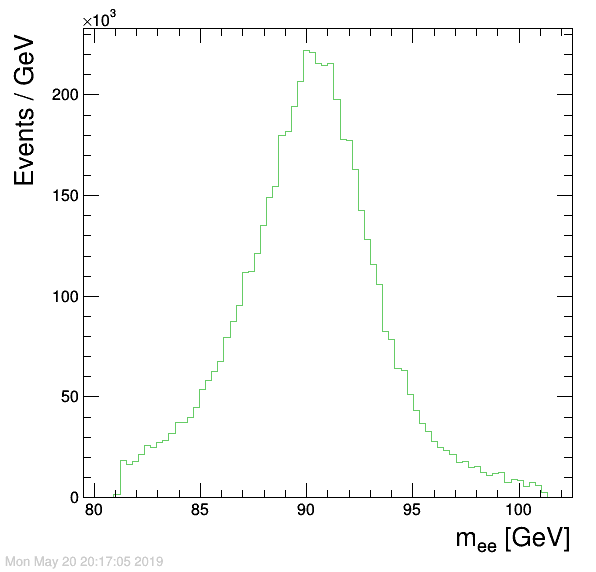

In [64]:
canvas = ROOT.TCanvas("canvas", "canvas")
hist_ZMass_ee.Draw("hist")
hist_ZMass_ee.GetYaxis().SetTitle("Events / GeV")
hist_ZMass_ee.Scale(DY_xsec*lumi/sumWeightsProcessed)
canvas.Draw()

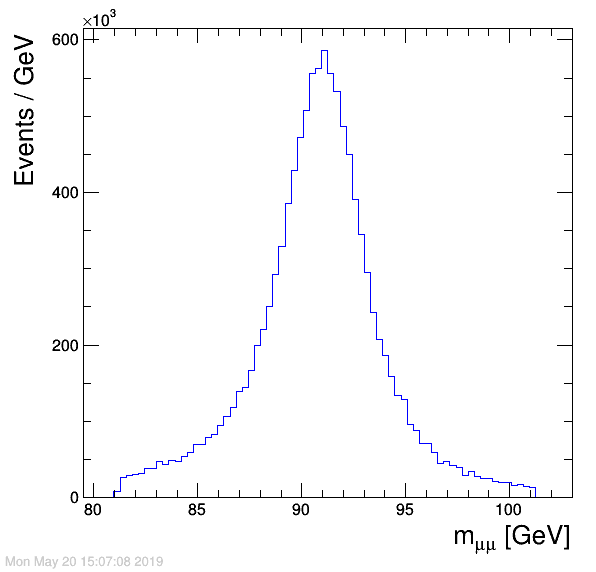

In [8]:
hist_ZMass_mm.Draw("hist")
hist_ZMass_mm.GetYaxis().SetTitle("Events / GeV")
hist_ZMass_mm.Scale(DY_xsec*lumi/sumWeightsProcessed)
canvas.Draw()

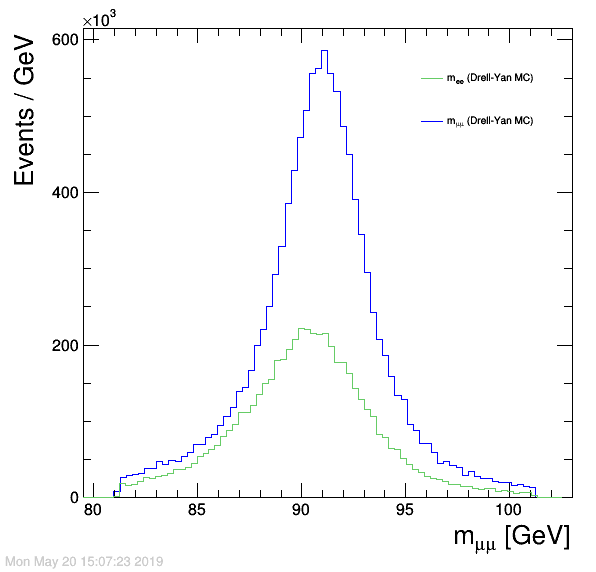

In [9]:
hist_ZMass_mm.Draw("hist")
hist_ZMass_ee.Draw("hist same")
legend = ROOT.TLegend(0.7,0.75,0.9,0.9)
legend.AddEntry(hist_ZMass_ee, "m_{ee} (Drell-Yan MC)", "l")
legend.AddEntry(hist_ZMass_mm, "m_{#mu#mu} (Drell-Yan MC)", "l")
legend.Draw()
canvas.Draw()

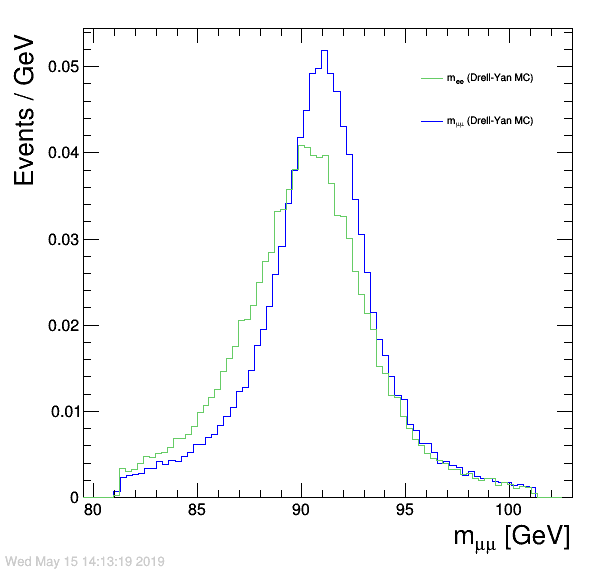

In [114]:
hist_ZMass_mm.Scale(1/hist_ZMass_mm.Integral())
hist_ZMass_ee.Scale(1/hist_ZMass_ee.Integral())
hist_ZMass_mm.Draw("hist")
hist_ZMass_ee.Draw("hist same")
legend.Draw()
canvas.Draw()

In [19]:
hist_ptl1_ee = rtfile.Get("Unknown/ptl1_ee")
hist_ptl1_mm = rtfile.Get("Unknown/ptl1_mm")
hist_ptl1_ee.SetLineColor(ROOT.kGreen-6)
hist_ptl1_mm.SetLineColor(ROOT.kBlue)

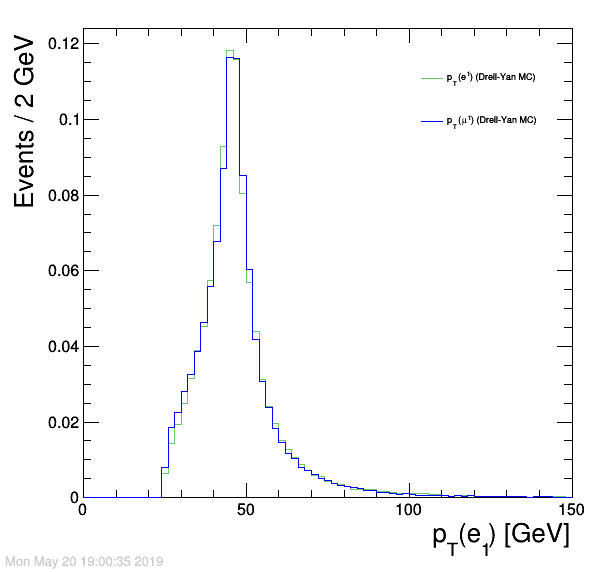

In [20]:
hist_ptl1_mm.Scale(1/hist_ptl1_mm.Integral())
hist_ptl1_ee.Scale(1/hist_ptl1_ee.Integral())
hist_ptl1_ee.GetYaxis().SetTitle("Events / 2 GeV")
hist_ptl1_mm.GetYaxis().SetTitle("Events / 2 GeV")
hist_ptl1_ee.Draw("hist")
hist_ptl1_mm.Draw("hist same")
legend = ROOT.TLegend(0.7,0.75,0.9,0.9)
legend.AddEntry(hist_ptl1_ee, "p_{T}(e^{1}) (Drell-Yan MC)", "l")
legend.AddEntry(hist_ptl1_mm, "p_{T}(#mu^{1}) (Drell-Yan MC)", "l")
legend.Draw()
canvas.Draw()

In [24]:
print hist_ptl1_ee.GetNbinsX()
print hist_ptl1_ee.Integral()

100
1.0


In [25]:
print hist_ptl1_mm.GetNbinsX()
print hist_ptl1_mm.Integral()

100
1.0


In [95]:
%run ./Utilities/scripts/makeHistFile.py --noHistConfig --test -f test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root -s TightWithLooseVeto -o testZskim.root -a Zstudy

INFO: assuming histogram information is specified in selector
Processing channel Inclusive for dataset test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root
INFO: using simple file test/9D8BBBB2-187D-CE49-9CAE-009ADB180509_Skim.root


INFO: Using default name "Unknown" for file


In [96]:
skimfile = ROOT.TFile("testZskim.root")
skimfile.cd("Unknown")

True

In [97]:
hist_ZMass_ee = rtfile.Get("Unknown/ZMass_ee")
hist_ZMass_mm = rtfile.Get("Unknown/ZMass_mm")
histskim_ZMass_ee = skimfile.Get("Unknown/ZMass_ee")
histskim_ZMass_mm = skimfile.Get("Unknown/ZMass_mm")

118725.0
118725.0


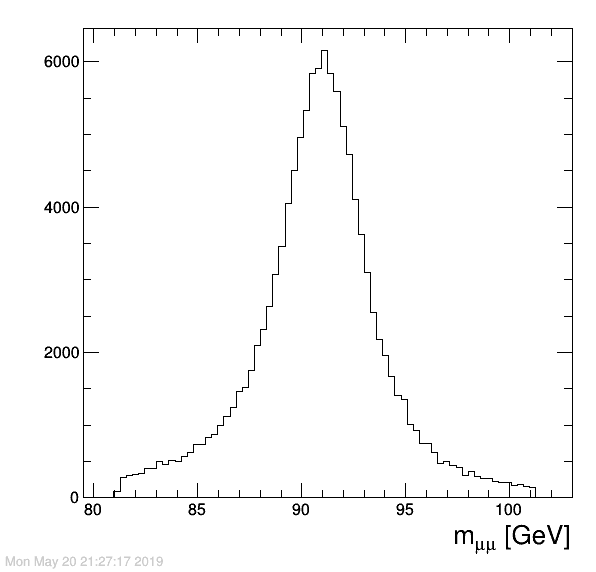

In [98]:
histskim_ZMass_mm.Draw("hist")
hist_ZMass_mm.Draw("hist same")
print histskim_ZMass_mm.Integral()
print hist_ZMass_mm.Integral()
canvas.Draw()

57071.0
57071.0


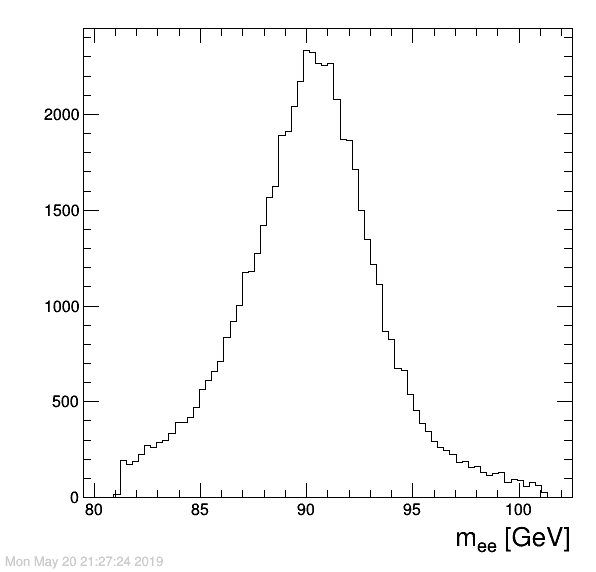

In [99]:
histskim_ZMass_ee.Draw("hist")
hist_ZMass_ee.Draw("hist same")
print histskim_ZMass_ee.Integral()
print hist_ZMass_ee.Integral()
canvas.Draw()

In [100]:
hist_cutflow_mm = rtfile.Get("Unknown/cutflow_mm")
hist_cutflow_ee = rtfile.Get("Unknown/cutflow_ee")
histskim_cutflow_ee = skimfile.Get("Unknown/cutflow_ee")
histskim_cutflow_mm = skimfile.Get("Unknown/cutflow_mm")

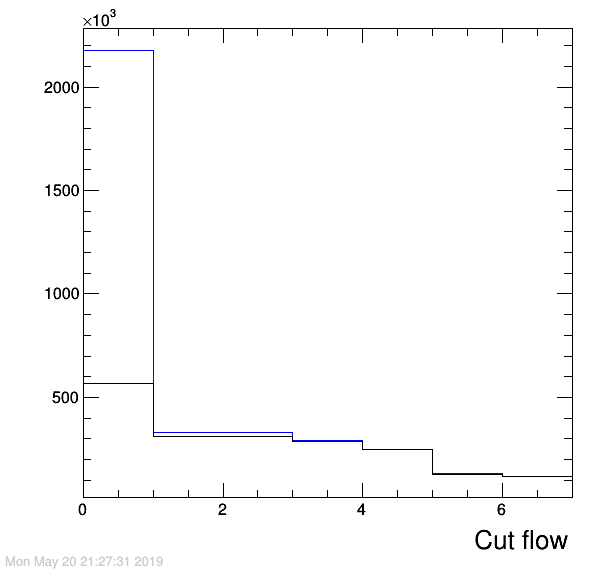

In [101]:
hist_cutflow_mm.SetLineColor(ROOT.kBlue)
hist_cutflow_mm.Draw("hist")
histskim_cutflow_mm.Draw("hist same")
canvas.Draw()

In [102]:
print histskim_cutflow_mm.GetBinContent(1)
print hist_cutflow_mm.GetBinContent(1)

569351.0
2174367.0


In [106]:
print histskim_cutflow_ee.GetBinContent(1)
print hist_cutflow_ee.GetBinContent(1)
print histskim_cutflow_ee.GetBinContent(5)
print hist_cutflow_ee.GetBinContent(5)

569351.0
2174367.0
109577.0
109577.0
